# Analyze matches

Here we show the (mis)matches we obtained with our tidal waveforms code to check the implementation. Idea is to run the Python script under test, which saves the samples with parameters and match values to a CSV, and then load it and analyze it here.

We are mainly focusing on NRTidalv2 since that breaks down for some parameters.

Imports:

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import jax
import matplotlib.pyplot as plt

## TODO remove?
# import jax.numpy as jnp
# from ripple import ms_to_Mc_eta
# from ripple.constants import MSUN, gt
# from jax import grad, vmap

%load_ext autoreload
%autoreload 2

params = {"axes.grid": True,
          "text.usetex" : True,
          "font.family" : "serif",
          "ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.serif" : ["Computer Modern Serif"],
          "xtick.labelsize": 16,
          "ytick.labelsize": 16,
          "axes.labelsize": 16,
          "legend.fontsize": 16,
          "legend.title_fontsize": 16,
          "figure.titlesize": 16}

plt.rcParams.update(params)
jax.config.update("jax_enable_x64", True) # improve precision for comparing waveforms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Auxiliary functions:

In [15]:
def get_chi_eff(chi1, chi2, m1, m2):
    return (chi1 * m1 + chi2 * m2) / (m1 + m2)

def get_chirp_mass(m1, m2):
    return (m1 * m2)**(3/5) / (m1 + m2)**(1/5)

## Load in match files

In [16]:
# Choose tidal waveform here
matches_filename = os.path.join(os.getcwd(), f"../test/matches_data/check_IMRPhenomD_NRTidalv2_matches.csv")
# matches_filename = os.path.join(os.getcwd(), f"../test/matches_data/check_IMRPhenomD_NRTidalv2_matches_low_spin.csv")

print(f"Reading in matches from {matches_filename}")
matches_df = pd.read_csv(matches_filename)

### Get the values
m1_values = matches_df["m1"].values
m2_values = matches_df["m2"].values
q_values = matches_df["m2"] / matches_df["m1"].values
chi1_values = matches_df["chi1"].values
chi2_values = matches_df["chi2"].values
lambda1_values = matches_df["lambda1"].values
lambda2_values = matches_df["lambda2"].values
mismatch_values = matches_df["mismatch"].values

### Show the df
matches_df

Reading in matches from /Users/Woute029/Documents/Code/ripple/notebooks/../test/matches_data/check_IMRPhenomD_NRTidalv2_matches.csv


,Unnamed: 0,m1,m2,chi1,chi2,lambda1,lambda2,dist_mpc,tc,phi_ref,inclination,match,mismatch
0,444,2.413301,2.108647,-0.846367,0.935943,289.258711,13.874998,40.0,0.0,0.0,0.0,0.999958,-4.380340
1,885,2.900286,2.563907,-0.627399,0.600008,51.622354,359.125423,40.0,0.0,0.0,0.0,0.999967,-4.477831
2,676,2.811204,1.712679,0.881022,0.669476,168.499132,279.450144,40.0,0.0,0.0,0.0,0.999981,-4.731174
3,558,2.770488,2.466251,0.977872,-0.065176,1045.990880,373.717361,40.0,0.0,0.0,0.0,0.999985,-4.821754
4,581,2.659941,2.548193,-0.933931,-0.658105,606.386657,4.414982,40.0,0.0,0.0,0.0,0.999985,-4.823849
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,395,2.979768,2.636818,-0.446317,-0.606604,3820.306606,2218.348487,40.0,0.0,0.0,0.0,1.000000,-10.305780
996,781,2.956206,2.741011,0.328282,-0.136865,4933.674231,1152.218366,40.0,0.0,0.0,0.0,1.000000,-10.313812
997,429,2.998402,2.666057,-0.727623,0.068980,3761.508351,3225.457745,40.0,0.0,0.0,0.0,1.000000,-10.316027
998,290,2.973059,2.800944,0.117086,-0.479933,3144.282004,4326.974429,40.0,0.0,0.0,0.0,1.000000,-10.341360


## Trying to find correlation

Mass and lambda

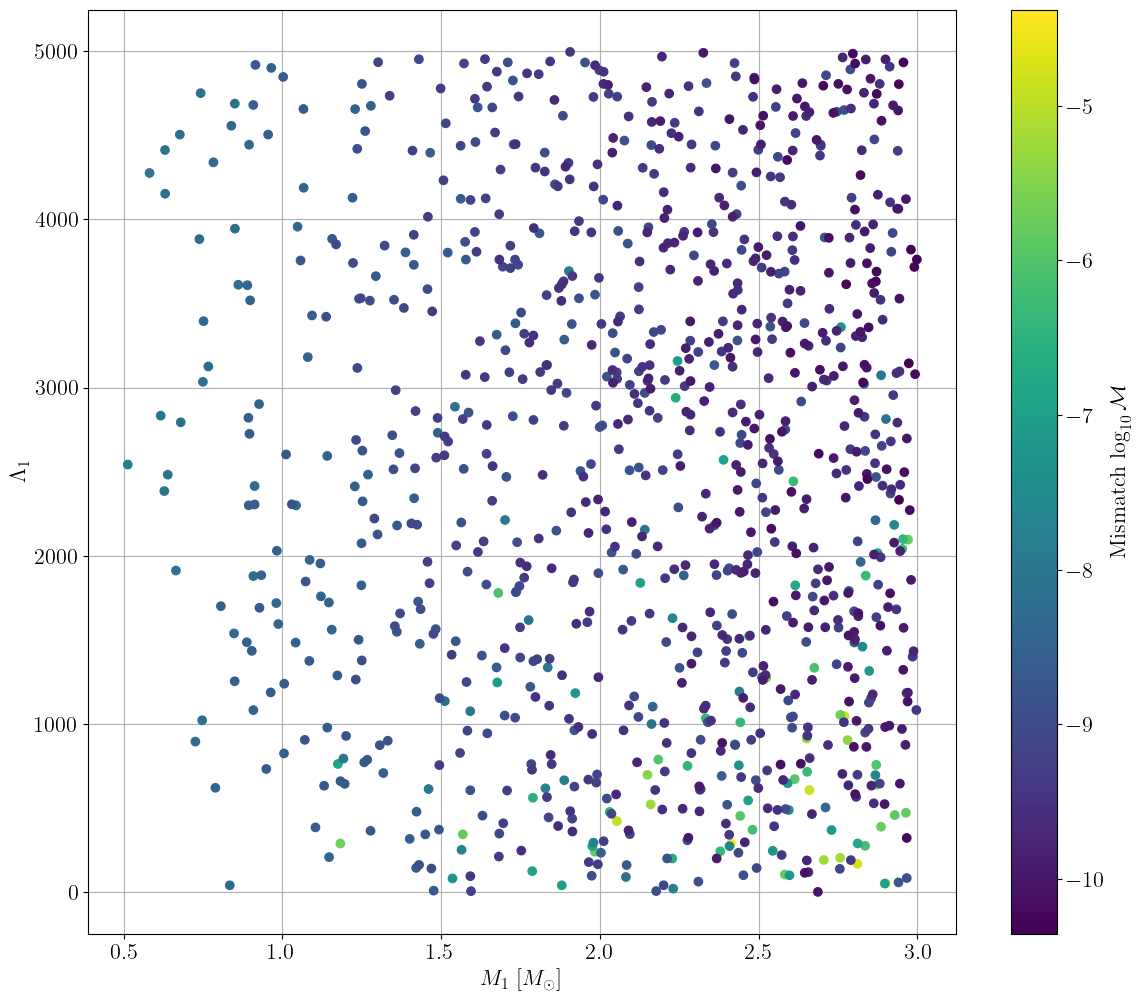

In [17]:
plt.figure(figsize = (14, 12))
plt.scatter(m1_values, lambda1_values, c = mismatch_values, zorder=100)
plt.xlabel(r"$M_1$ [$M_{\odot}$]")
plt.ylabel(r"$\Lambda_1$")
cbar = plt.colorbar()
cbar.set_label(r"Mismatch $\log_{10} \mathcal{M}$")
plt.show()

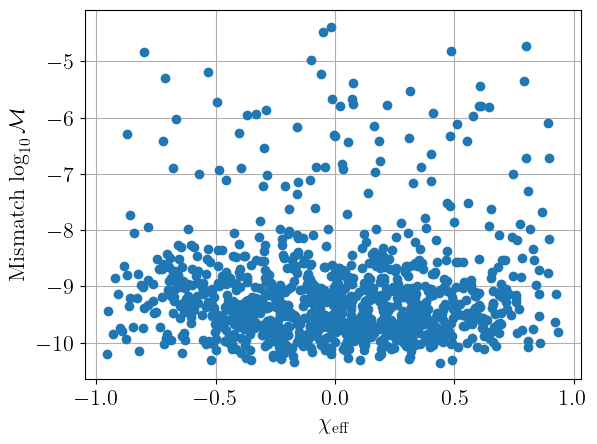

In [18]:
chi_eff = get_chi_eff(chi1_values, chi2_values, m1_values, m2_values)
plt.scatter(chi_eff, mismatch_values, zorder=100)
plt.xlabel(r"$\chi_{\rm{eff}}$")
plt.ylabel(r"Mismatch $\log_{10} \mathcal{M}$")
plt.show()

In [19]:
# # Define chi_ratios, which is chi1 / chi2 but makes sure that chi1 > chi2
# chi_ratios = np.zeros(len(chi1_values))
# for i in range(len(chi1_values)):
#     if chi1_values[i] >= chi2_values[i]:
#         chi_ratios[i] = chi1_values[i] / chi2_values[i]
#     else:
#         chi_ratios[i] = chi2_values[i] / chi1_values[i]
# plt.scatter(abs(chi_ratios), mismatch_values, zorder=100)
# plt.xlabel(r"$\chi_{\rm{eff}}$")
# plt.ylabel(r"Mismatch $\log_{10} \mathcal{M}$")
# plt.xlim(0, 1)
# plt.show()

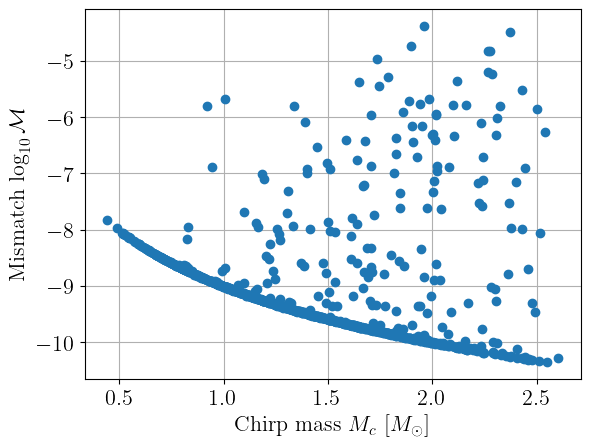

In [20]:
chirp_mass = get_chirp_mass(m1_values, m2_values)
plt.scatter(chirp_mass, mismatch_values, zorder=100)
plt.xlabel(r"Chirp mass $M_c$ [$M_{\odot}$]")
plt.ylabel(r"Mismatch $\log_{10} \mathcal{M}$")
plt.show()

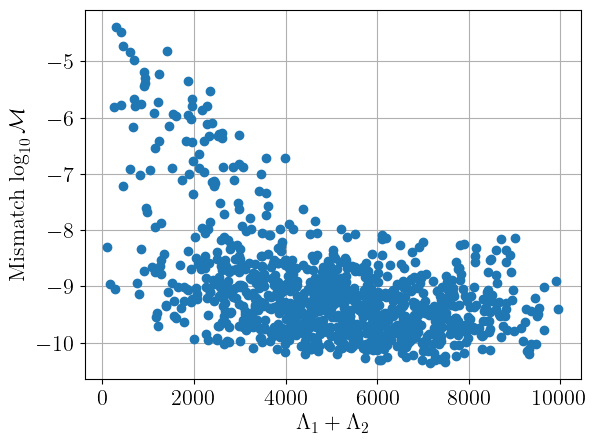

In [21]:
plt.scatter(lambda1_values + lambda2_values, mismatch_values, zorder=100)
plt.xlabel(r"$\Lambda_1 + \Lambda_2$")
plt.ylabel(r"Mismatch $\log_{10} \mathcal{M}$")
plt.show()

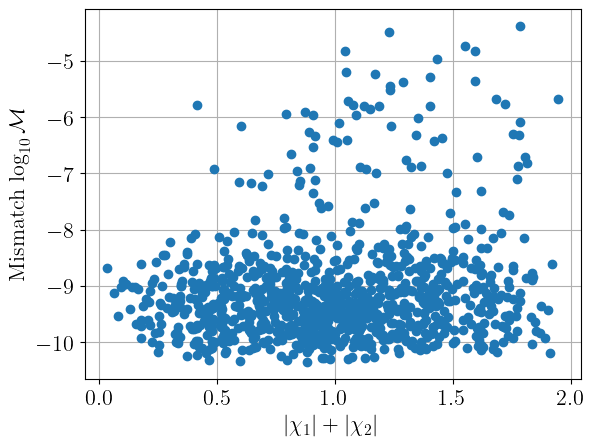

In [22]:
plt.scatter(abs(chi1_values) + abs(chi2_values), mismatch_values, zorder=100)
plt.xlabel(r"$|\chi_1| + |\chi_2|$")
plt.ylabel(r"Mismatch $\log_{10} \mathcal{M}$")
plt.show()

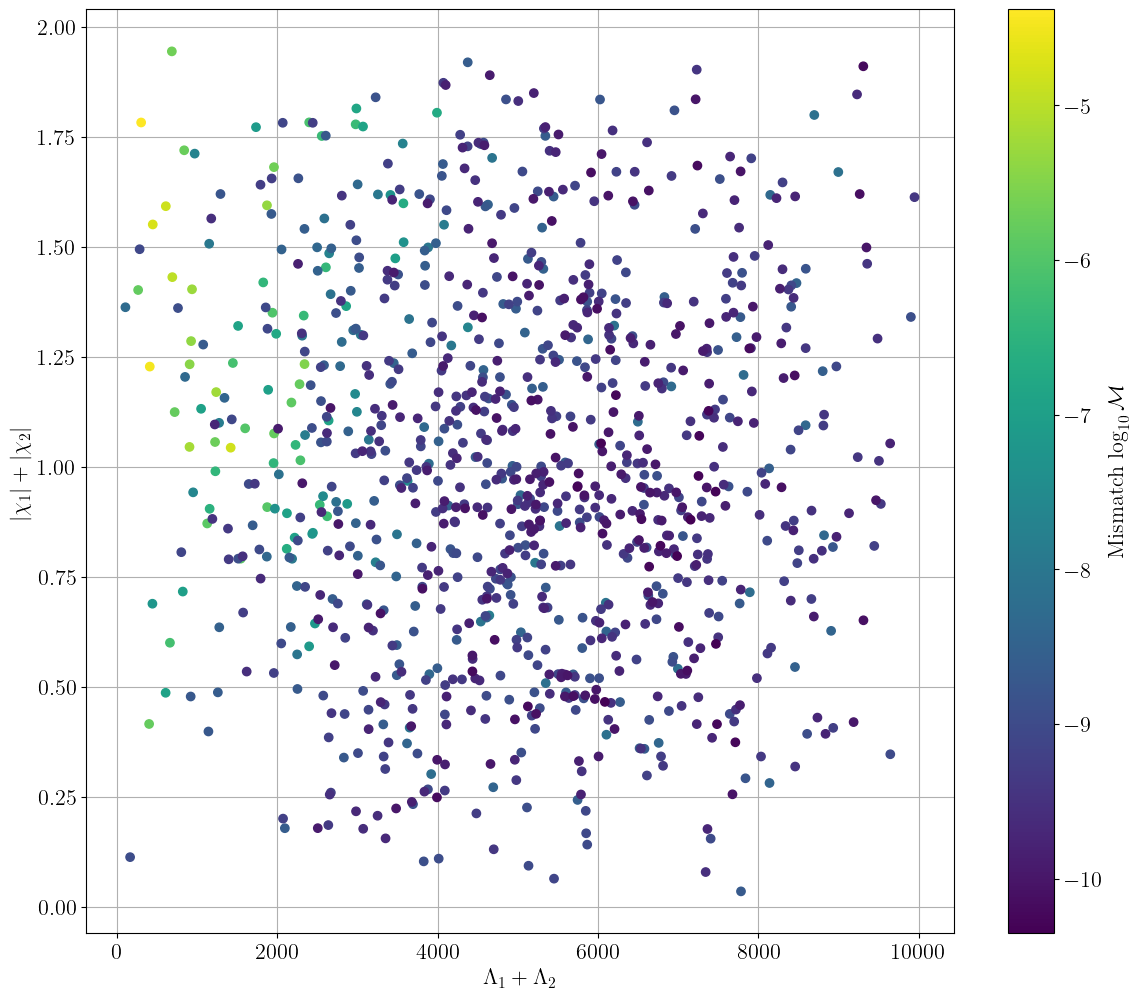

In [23]:
# Plot them
plt.figure(figsize = (14, 12))
plt.scatter(lambda1_values + lambda2_values, abs(chi1_values) + abs(chi2_values), c = mismatch_values, zorder=100)
plt.xlabel(r"$\Lambda_1 + \Lambda_2$")
plt.ylabel(r"$|\chi_1| + |\chi_2|$")
cbar = plt.colorbar()
cbar.set_label(r"Mismatch $\log_{10} \mathcal{M}$")
plt.show()

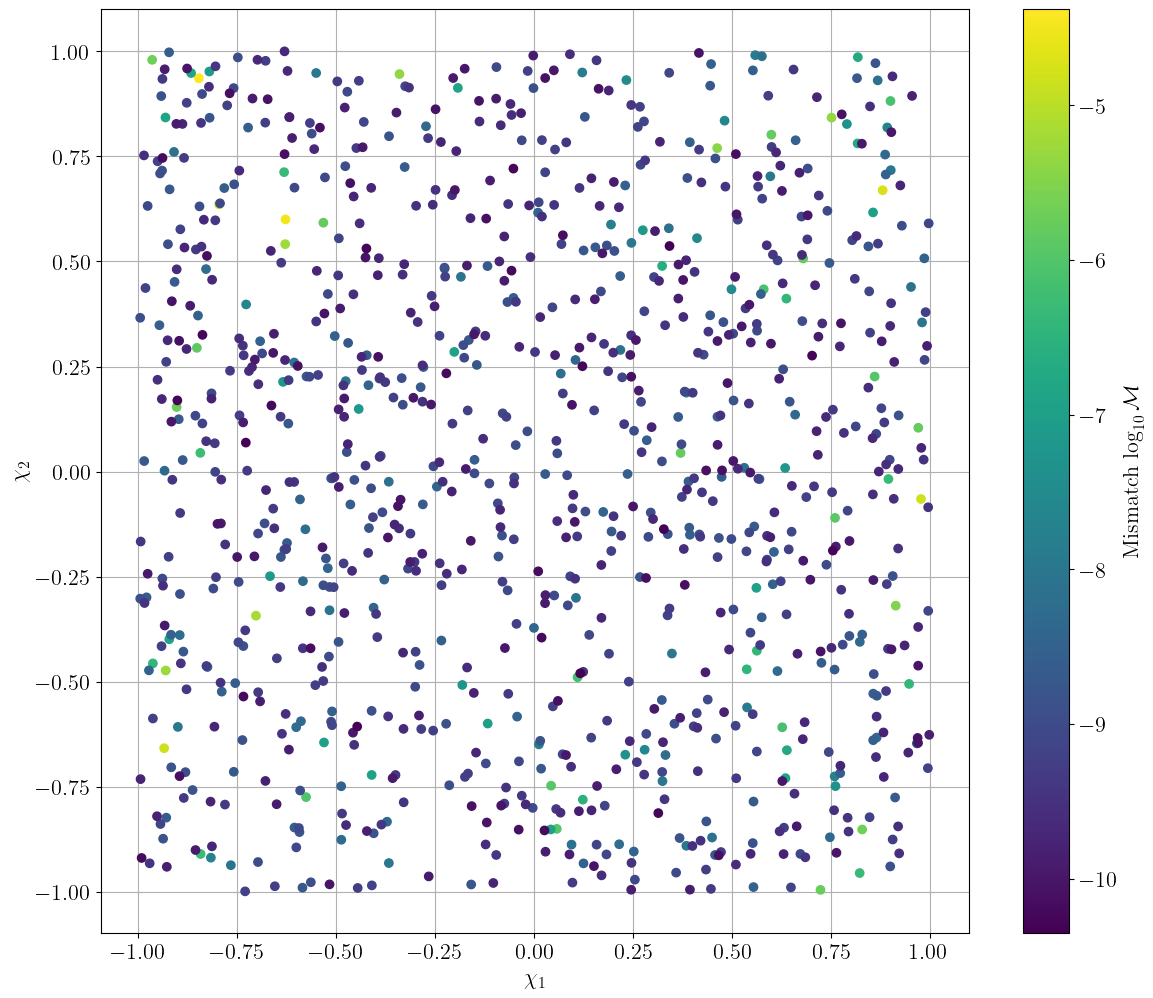

In [24]:
# Plot them
plt.figure(figsize = (14, 12))
plt.scatter(chi1_values, chi2_values, c = mismatch_values, zorder=100)
plt.xlabel(r"$\chi_1$")
plt.ylabel(r"$\chi_2$")
cbar = plt.colorbar()
cbar.set_label(r"Mismatch $\log_{10} \mathcal{M}$")
plt.show()

Seems that the problem is alleviated partially if chi1 is close to chi2, since we have a diagonal of lower mismatch values in the above plot. For low spins, the results are also pretty good.

## Check distributions of mismatches

Reading in matches from /Users/Woute029/Documents/Code/ripple/notebooks/../test/matches_data/check_IMRPhenomD_matches.csv
Reading in matches from /Users/Woute029/Documents/Code/ripple/notebooks/../test/matches_data/check_IMRPhenomD_NRTidalv2_matches.csv
Reading in matches from /Users/Woute029/Documents/Code/ripple/notebooks/../test/matches_data/check_IMRPhenomD_NRTidalv2_matches_low_spin.csv
Reading in matches from /Users/Woute029/Documents/Code/ripple/notebooks/../test/matches_data/check_IMRPhenomD_NRTidalv2_matches_zero_lambda.csv
Reading in matches from /Users/Woute029/Documents/Code/ripple/notebooks/../test/matches_data/check_TaylorF2_matches.csv


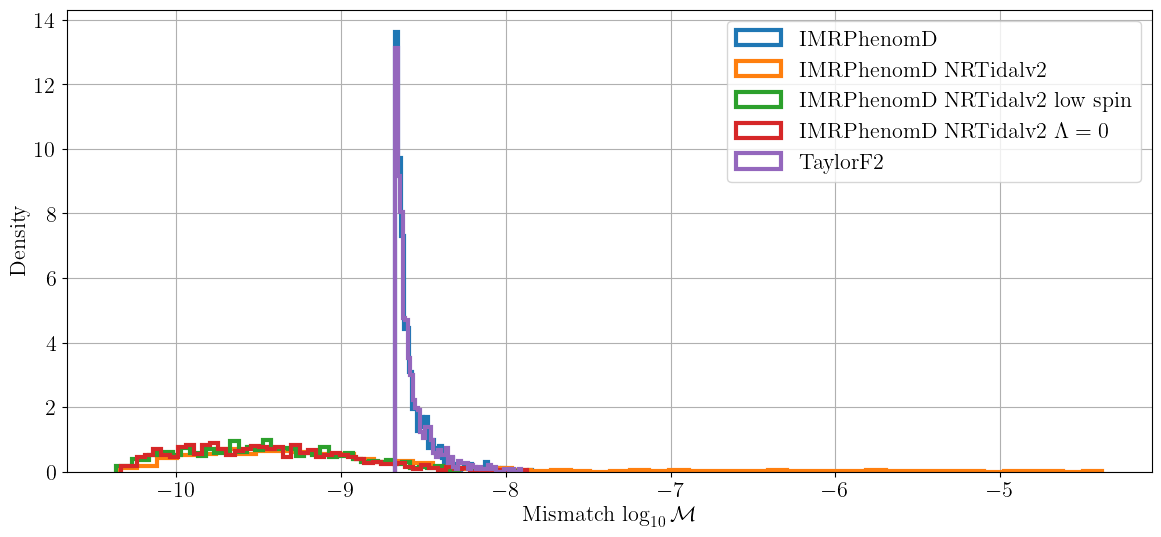

In [25]:
mismatch_files = [os.path.join(os.getcwd(), f"../test/matches_data/check_IMRPhenomD_matches.csv"), 
                  os.path.join(os.getcwd(), f"../test/matches_data/check_IMRPhenomD_NRTidalv2_matches.csv"), 
                  os.path.join(os.getcwd(), f"../test/matches_data/check_IMRPhenomD_NRTidalv2_matches_low_spin.csv"),
                  os.path.join(os.getcwd(), f"../test/matches_data/check_IMRPhenomD_NRTidalv2_matches_zero_lambda.csv"),
                  os.path.join(os.getcwd(), f"../test/matches_data/check_TaylorF2_matches.csv")]

names = ["IMRPhenomD", 
         "IMRPhenomD NRTidalv2", 
         "IMRPhenomD NRTidalv2 low spin", 
         r"IMRPhenomD NRTidalv2 $\Lambda = 0$", 
         "TaylorF2"]

plt.figure(figsize = (14, 6))
for mismatch_file, name in zip(mismatch_files, names):
    print(f"Reading in matches from {mismatch_file}")
    matches_df = pd.read_csv(mismatch_file)
    mismatch_values = matches_df["mismatch"].values
    plt.hist(mismatch_values, bins=50, histtype='step', linewidth=3, density=True, label=name)
plt.xlabel(r"Mismatch $\log_{10} \mathcal{M}$")
plt.legend()
plt.ylabel("Density")
plt.show()

To compare consistency, ignore NRTidalv2 and check waveforms that *do* work.

**Observation**: While NRTidalv2 is OK for low spin, we do notice that the performance is slightly worse compared to when either spins or lambdas are zero, or as compared to the BBH baseline GW.

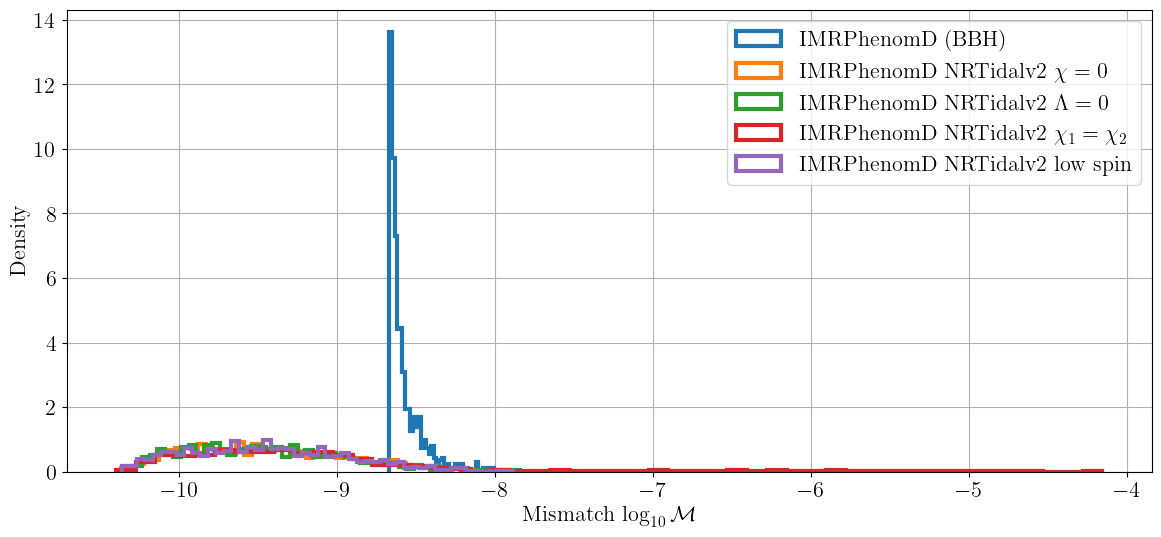

In [26]:
mismatch_files = [os.path.join(os.getcwd(), f"../test/matches_data/check_IMRPhenomD_matches.csv"), 
                  os.path.join(os.getcwd(), f"../test/matches_data/check_IMRPhenomD_NRTidalv2_matches_zero_spin.csv"),
                  os.path.join(os.getcwd(), f"../test/matches_data/check_IMRPhenomD_NRTidalv2_matches_zero_lambda.csv"),
                  os.path.join(os.getcwd(), f"../test/matches_data/check_IMRPhenomD_NRTidalv2_matches_high_spin_equal.csv"),
                  os.path.join(os.getcwd(), f"../test/matches_data/check_IMRPhenomD_NRTidalv2_matches_low_spin.csv"),
                  ] # os.path.join(os.getcwd(), f"../test/matches_data/check_TaylorF2_matches.csv") # ignore TF2 for now

names = ["IMRPhenomD (BBH)", 
         r"IMRPhenomD NRTidalv2 $\chi = 0$", 
         r"IMRPhenomD NRTidalv2 $\Lambda = 0$", 
         r"IMRPhenomD NRTidalv2 $\chi_1 = \chi_2$", 
         "IMRPhenomD NRTidalv2 low spin", 
         ] # "TaylorF2" # ignore TF2 for now

plt.figure(figsize = (14, 6))
for mismatch_file, name in zip(mismatch_files, names):
    matches_df = pd.read_csv(mismatch_file)
    mismatch_values = matches_df["mismatch"].values
    plt.hist(mismatch_values, bins=50, histtype='step', linewidth=3, density=True, label=name)

plt.xlabel(r"Mismatch $\log_{10} \mathcal{M}$")
plt.legend()
plt.ylabel("Density")
plt.show()

Single histograms:

Reading in matches from /Users/Woute029/Documents/Code/ripple/notebooks/../test/matches_data/check_IMRPhenomD_NRTidalv2_matches.csv
Reading in matches from /Users/Woute029/Documents/Code/ripple/notebooks/../test/matches_data/check_IMRPhenomD_NRTidalv2_matches_low_spin.csv
Reading in matches from /Users/Woute029/Documents/Code/ripple/notebooks/../test/matches_data/check_IMRPhenomD_NRTidalv2_matches_zero_lambda.csv


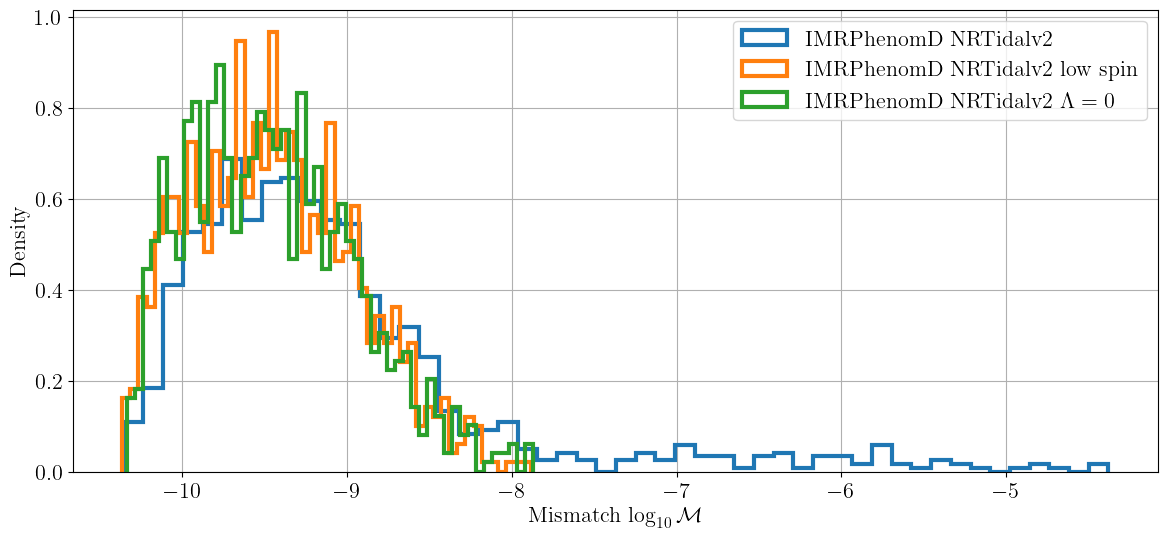

In [27]:
mismatch_files = [os.path.join(os.getcwd(), f"../test/matches_data/check_IMRPhenomD_NRTidalv2_matches.csv"), 
                  os.path.join(os.getcwd(), f"../test/matches_data/check_IMRPhenomD_NRTidalv2_matches_low_spin.csv"),
                  os.path.join(os.getcwd(), f"../test/matches_data/check_IMRPhenomD_NRTidalv2_matches_zero_lambda.csv")]

names = ["IMRPhenomD NRTidalv2", 
         "IMRPhenomD NRTidalv2 low spin", 
         r"IMRPhenomD NRTidalv2 $\Lambda = 0$"]

plt.figure(figsize = (14, 6))
for mismatch_file, name in zip(mismatch_files, names):
    print(f"Reading in matches from {mismatch_file}")
    matches_df = pd.read_csv(mismatch_file)
    mismatch_values = matches_df["mismatch"].values
    plt.hist(mismatch_values, bins=50, histtype='step', linewidth=3, density=True, label=name)
plt.xlabel(r"Mismatch $\log_{10} \mathcal{M}$")
plt.legend()
plt.ylabel("Density")
plt.show()